In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('../../../../archive/Limited_high_diamond.csv')

In [4]:
df

,blueWins,blueWardsPlaced,blueFirstBlood,blueKills,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueAvgLevel,blueCSPerMin,...,blueHas39,redHas39,blueHas517,redHas517,blueMaxLevel,blueMinLevel,blueSTDLevels,redMaxLevel,redMinLevel,redSTDLevels
0,0,28,1,9,11,0,0,0,6.6,19.5,...,False,False,False,False,7,5,0.800000,8,6,0.748331
1,0,12,0,5,5,0,0,0,6.6,17.4,...,False,True,False,False,8,5,1.019804,8,5,1.166190
2,0,15,0,7,4,1,0,0,6.4,18.6,...,False,False,False,False,8,5,1.019804,8,6,0.979796
3,0,43,0,4,5,0,1,0,7.0,20.1,...,False,False,False,False,8,6,0.632456,8,6,0.894427
4,0,75,0,6,6,0,0,0,7.0,21.0,...,False,False,False,False,8,5,1.095445,8,6,0.894427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,1,7,5,1,0,0,7.2,21.1,...,False,False,False,True,8,6,0.748331,8,6,0.979796
9875,1,54,0,6,8,1,0,0,7.2,23.3,...,False,False,False,False,8,6,0.748331,8,6,0.894427
9876,0,23,0,6,5,0,0,0,7.0,21.0,...,False,False,False,False,8,6,0.632456,9,6,1.019804
9877,0,14,1,2,3,1,0,0,6.6,22.4,...,False,True,False,False,8,6,0.800000,8,6,0.748331


In [5]:
X = df.drop('blueWins', axis = 1)
y = df['blueWins']

In [6]:
folds = KFold(n_splits = 5, shuffle = True)

In [7]:
logreg = LogisticRegression(fit_intercept = False, solver = 'saga')
scaler = MinMaxScaler()

trainings = []
testings = []
for train_ind, test_ind in folds.split(X):
    X_tr, X_te = X.iloc[train_ind], X.iloc[test_ind]
    y_tr, y_te = y.iloc[train_ind], y.iloc[test_ind]
    
    X_tr = scaler.fit_transform(X_tr)
    X_te = scaler.transform(X_te)
    
    logreg.fit(X_tr, y_tr)
    
    yhat_tr = logreg.predict(X_tr)
    yhat_te = logreg.predict(X_te)
    
    trainings.append(accuracy_score(y_tr, yhat_tr))
    testings.append(accuracy_score(y_te, yhat_te))

In [8]:
trainings

[0.7369353410097431,
 0.7313678349993673,
 0.7298494242692648,
 0.7352903960521321,
 0.7383603238866396]

In [9]:
testings

[0.7160931174089069,
 0.7459514170040485,
 0.7479757085020243,
 0.7226720647773279,
 0.7154430379746836]

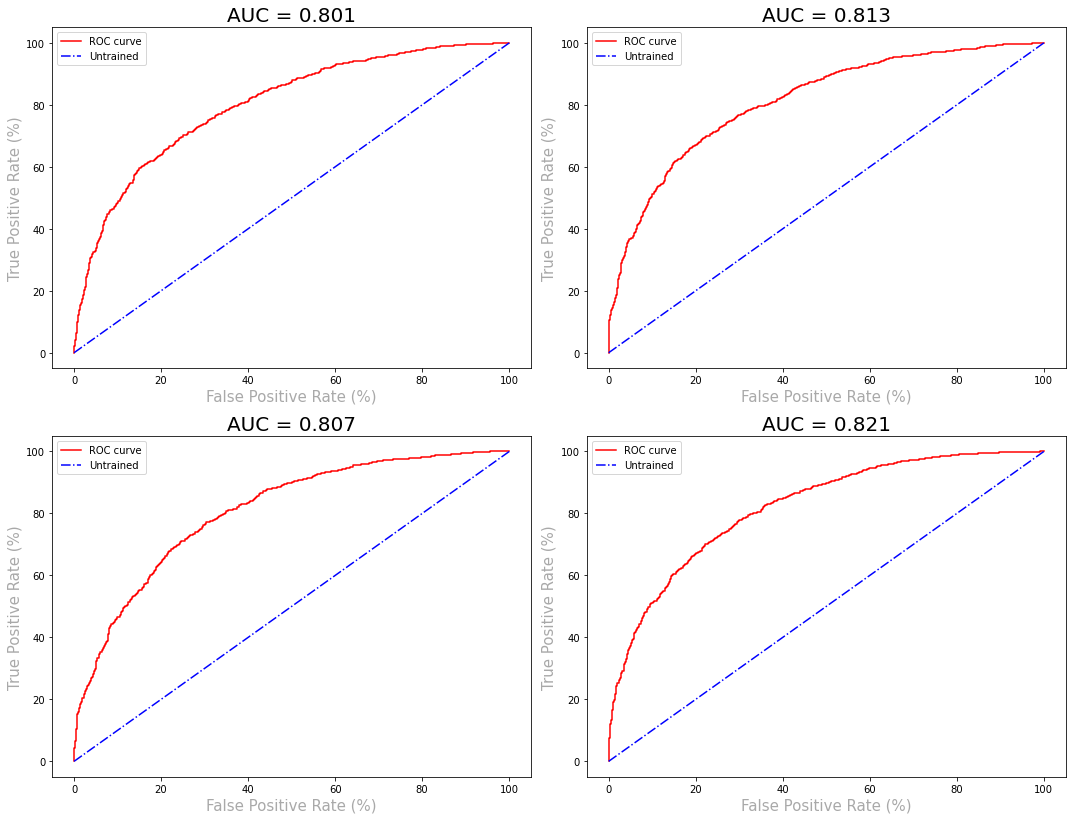

In [10]:
folds = KFold(n_splits = 4, shuffle = True)
fig, axes = plt.subplots(figsize = (15,11.5), nrows = 2, ncols = 2)

for ax, (train_ind, test_ind) in zip(axes.flatten(), folds.split(X)):
    X_tr, X_te = X.iloc[train_ind], X.iloc[test_ind]
    y_tr, y_te = y.iloc[train_ind], y.iloc[test_ind]
    
    X_tr = scaler.fit_transform(X_tr)
    X_te = scaler.transform(X_te)
    
    y_score = logreg.fit(X_tr, y_tr).decision_function(X_te)
    
    fpr, tpr, thresholds = roc_curve(y_te, y_score)
    auc_score = auc(fpr, tpr)
    
    ax.plot(fpr*100, tpr*100, color = 'r', label = 'ROC curve')
    ax.plot([0,100],[0,100], color = 'b', linestyle = '-.', label = 'Untrained')
    ax.set_xlabel('False Positive Rate (%)', fontsize = 15, color = 'darkgrey')
    ax.set_ylabel('True Positive Rate (%)', fontsize = 15, color = 'darkgrey')
    
    ax.set_title(f'AUC = {round(auc_score, 3)}',
                 fontsize = 20)
    
    ax.legend()

fig.tight_layout()

In [14]:
X.columns

Index(['blueWardsPlaced', 'blueFirstBlood', 'blueKills', 'blueAssists',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueAvgLevel',
       'blueCSPerMin', 'redKills', 'redAssists', 'redDragons', 'redHeralds',
       'redTowersDestroyed', 'redAvgLevel', 'redCSPerMin', 'bluePredWinrate',
       'redPredWinrate', 'blueAvgPickrate', 'redAvgPickrate', 'blueHas62',
       'redHas62', 'blueHas111', 'redHas111', 'blueHas145', 'redHas145',
       'blueHas39', 'redHas39', 'blueHas517', 'redHas517', 'blueMaxLevel',
       'blueMinLevel', 'blueSTDLevels', 'redMaxLevel', 'redMinLevel',
       'redSTDLevels'],
      dtype='object')

In [28]:
list(zip(X.columns, logreg.coef_[0]))

[('blueWardsPlaced', -0.4055430803664544),
 ('blueFirstBlood', 0.16508012356949284),
 ('blueKills', 3.278195843085905),
 ('blueAssists', 0.31599758680185613),
 ('blueDragons', 0.3943321476670871),
 ('blueHeralds', 0.07900990853915696),
 ('blueTowersDestroyed', 0.8664626944849808),
 ('blueAvgLevel', 2.8280327056197643),
 ('blueCSPerMin', 1.7491480284158896),
 ('redKills', -3.120027201108314),
 ('redAssists', -0.3107945591386464),
 ('redDragons', -0.2873998916083959),
 ('redHeralds', -0.10290589902312633),
 ('redTowersDestroyed', -0.27287139144873895),
 ('redAvgLevel', -2.8325817860534275),
 ('redCSPerMin', -1.4368710370313547),
 ('bluePredWinrate', 1.676160621226666),
 ('redPredWinrate', -1.9354890215001845),
 ('blueAvgPickrate', -0.15763383791637575),
 ('redAvgPickrate', 0.5250367968579487),
 ('blueHas62', 0.012938040897071974),
 ('redHas62', -0.03982234828803982),
 ('blueHas111', -0.16811840291458816),
 ('redHas111', 0.07009524062897228),
 ('blueHas145', 0.03156421778610793),
 ('redHa